# Problem statement:
Given the univariate land_size and house price of a geographical location, predict the selling price of a new house in that location

Using linear regression(univariate)
1. import necessary libraries
2. load the univariate dataset
3. reshape the features to regression(-1,1)
4. using fit module in linear regression obtain the coefficient and intercept:

    (a) regr= linear_model.LinearRegression()
    
    (b) regr.fit(features, target)
    
    print("coefficients =" , regr.coef_)
    print("intercepts =" , regr.intercept_)
5. plot the prediction line

In [82]:
#import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
style.use("ggplot")

from sklearn import datasets, linear_model

In [83]:
#datasets(univariate)
house_price =[245, 312, 279, 308, 199, 219, 405, 324, 319, 255] #target
land_size =[1400, 1600, 1700, 1875, 1100, 1550, 2350,2450, 1425, 1700] #features

In [84]:
#Reshape the feature to regression
land_sizenew = np.array(land_size).reshape((-1,1))
print(land_sizenew)

[[1400]
 [1600]
 [1700]
 [1875]
 [1100]
 [1550]
 [2350]
 [2450]
 [1425]
 [1700]]


In [170]:
from sklearn.linear_model import LinearRegression
regr= LinearRegression()
from sklearn.model_selection import train_test_split


In [209]:
X_train,X_test,Y_train,Y_test = train_test_split(land_sizenew,house_price, test_size=0.30)
print(Y_train, Y_test)

[245, 324, 312, 199, 308, 219, 319] [255, 405, 279]


In [210]:
 #train the model
regr= linear_model.LinearRegression()
regr.fit(X_train,Y_train)
print("coefficients =" , regr.coef_)
print("intercepts =" , regr.intercept_)

coefficients = [0.08049624]
intercepts = 144.0489835120858


In [211]:
regr.predict(X_test)

array([280.89258844, 333.21514327, 280.89258844])

In [212]:
Y_test

[255, 405, 279]

In [213]:
regr.score(X_test,Y_test)

0.551211207394787

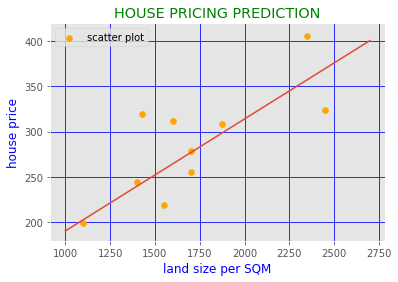

In [157]:
#plot the predicition line
def graph(formula,x_range):
    x =np.array(x_range)
    y = eval(formula)
    plt.plot(x,y)
graph('regr.coef_*x + regr.intercept_', range(1000, 2700))
plt.scatter(land_size,house_price, color="orange", label="scatter plot")
plt.grid(color="blue")
plt.ylabel("house price", color ="blue")
plt.xlabel("land size per SQM", color="blue")
plt.title("HOUSE PRICING PREDICTION", color="green")
plt.legend()
plt.show()

In [158]:
landsize_new = 1400
print("the house should be sold for $",regr.predict(landsize_new))

the house should be sold for $ [240.01097424]


In [161]:
from sklearn.externals import joblib
joblib.dump(regr, 'uni_house')
app = joblib.load('uni_house')
app.predict(1400)

array([240.01097424])